In [7]:
#Create a model that can predict the price of the house based on characteristics of house and area population.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df=pd.read_csv("Data/USA_Housing.csv",header=None , names = ['Income','HouseAge','NumberOfRooms',
                                                             "NumberOfBedrooms","Population","Price",
                                                             "Address"])

In [33]:
df.head()

,Income,HouseAge,NumberOfRooms,NumberOfBedrooms,Population,Price,Address
0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1,79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456,1059033.5578701235,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
2,79248.64245482568,6.0028998082752425,6.730821019094919,3.09,40173.07217364482,1505890.91484695,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
3,61287.067178656784,5.865889840310001,8.512727430375099,5.13,36882.15939970458,1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
4,63345.24004622798,7.1882360945186425,5.586728664827653,3.26,34310.24283090706,1260616.8066294468,USS Barnett\nFPO AP 44820


In [40]:
#Check For Correlation
df.corr()
#  Label(Price) and following Featurs (House Age,Population,Number of Rooms) has some Corellation exist

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


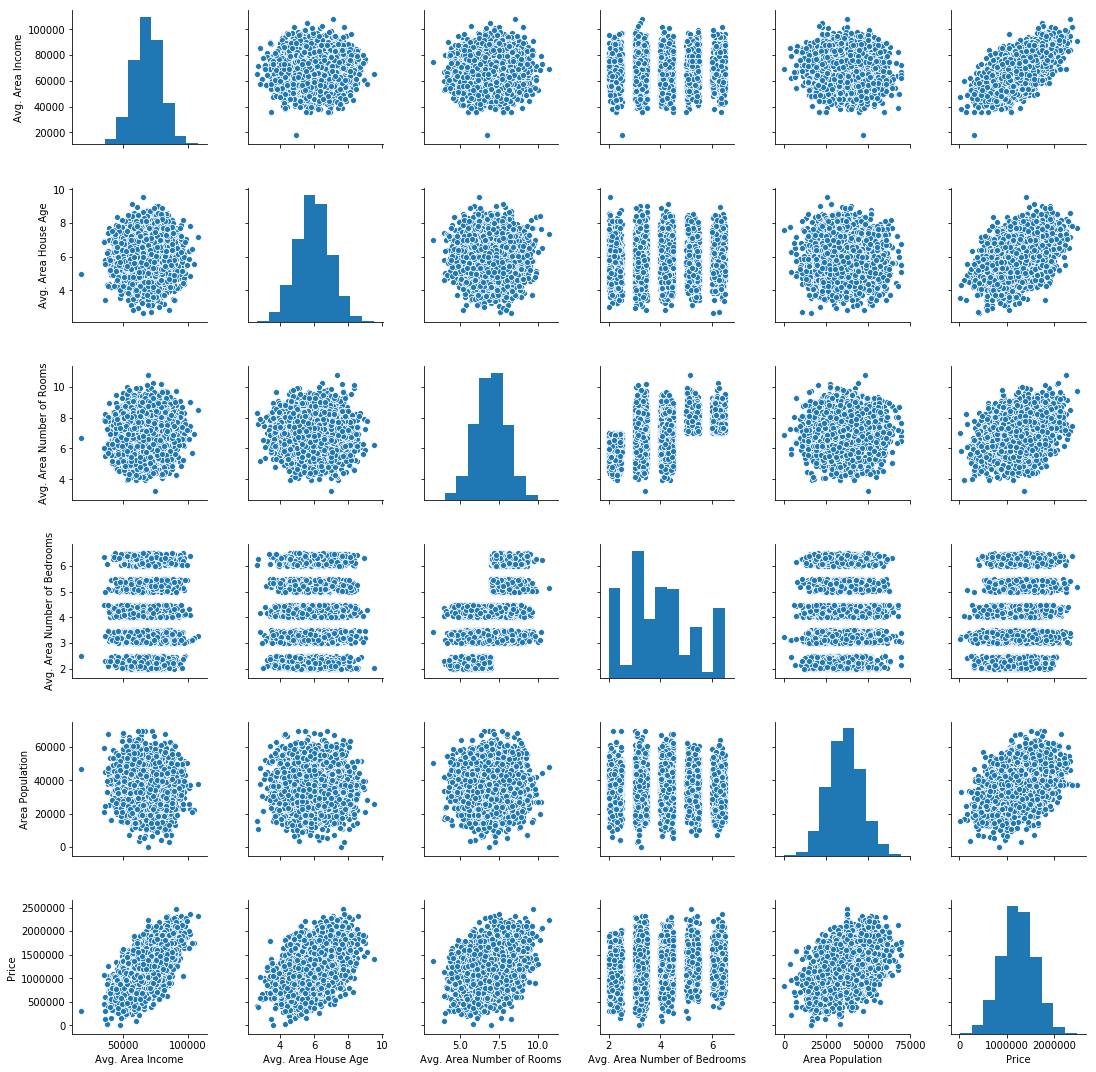

In [6]:
sns.pairplot(df)

In [80]:
#Create Feature and Label
featuers = df.iloc[:,[1,2,3,4]].values
label=df.iloc[:,[5]].values
df.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [43]:
'''
No Null value and No duplicate in the data set and as well as no categorical data exist considering the requirement
As Price is Numeric we will go for Regreassion
'''



'\nNo Null value and No duplicate in the data set and as well as no categorical data exist considering the requirement\nAs Price is Numeric we will go for Regreassion\n'

In [86]:
#finding Best Random Sate for Generalised Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
count=1
testScoreList=list([])
for i in range(1,5001):
    X_train,X_test,y_train,y_test =train_test_split(featuers,label,test_size=0.2,random_state=i)
    model=LinearRegression()
    model.fit(X_train,y_train)
    training_score = model.score(X_train,y_train)
    testing_score=model.score(X_test,y_test)
    
    if(testing_score>training_score):
        testScoreList.append(testing_score)
        count=count+1
        print("Training Score is {} Testing Score is {} in Random state {}".format(training_score,testing_score,i))
        print("Count:{}".format(count))

Training Score is 0.48550492402127154 Testing Score is 0.524884630455337 in Random state 1
Count:2
Training Score is 0.4940188794151372 Testing Score is 0.495219035197197 in Random state 2
Count:3
Training Score is 0.48901104501821724 Testing Score is 0.5142811320764356 in Random state 4
Count:4
Training Score is 0.49158050110161333 Testing Score is 0.5035300055929187 in Random state 6
Count:5
Training Score is 0.49021615471819824 Testing Score is 0.5110649841985417 in Random state 8
Count:6
Training Score is 0.4896665142508063 Testing Score is 0.5107951016904375 in Random state 9
Count:7
Training Score is 0.493667726756307 Testing Score is 0.4951354312624854 in Random state 10
Count:8
Training Score is 0.49109021055578983 Testing Score is 0.5061934091298199 in Random state 11
Count:9
Training Score is 0.48637631003456117 Testing Score is 0.524953209779715 in Random state 14
Count:10
Training Score is 0.4937674856060901 Testing Score is 0.4960227822733255 in Random state 15
Count:11
Tr

Training Score is 0.49182951298398336 Testing Score is 0.5043945845298622 in Random state 229
Count:106
Training Score is 0.4891207413562577 Testing Score is 0.5152649300581539 in Random state 231
Count:107
Training Score is 0.4923082427956158 Testing Score is 0.5016831408653325 in Random state 232
Count:108
Training Score is 0.49197985006445233 Testing Score is 0.5033324235736661 in Random state 234
Count:109
Training Score is 0.49372383345463966 Testing Score is 0.49599740561451533 in Random state 244
Count:110
Training Score is 0.48670444000673163 Testing Score is 0.5244815300282616 in Random state 248
Count:111
Training Score is 0.4907204144017695 Testing Score is 0.506633233695394 in Random state 251
Count:112
Training Score is 0.4901521164614713 Testing Score is 0.5093115739738301 in Random state 252
Count:113
Training Score is 0.4860530365952882 Testing Score is 0.5234322502889387 in Random state 253
Count:114
Training Score is 0.4855198505753522 Testing Score is 0.5255723329586

Training Score is 0.4906405835480141 Testing Score is 0.5081679797967102 in Random state 457
Count:225
Training Score is 0.49202775416929645 Testing Score is 0.4993410117958006 in Random state 460
Count:226
Training Score is 0.486776502903693 Testing Score is 0.5229888237564925 in Random state 462
Count:227
Training Score is 0.4914269282147364 Testing Score is 0.5052536375313982 in Random state 463
Count:228
Training Score is 0.49111454814771727 Testing Score is 0.5062081789794682 in Random state 464
Count:229
Training Score is 0.48124948545755175 Testing Score is 0.5440395130529955 in Random state 465
Count:230
Training Score is 0.49246923083701655 Testing Score is 0.5012185783420222 in Random state 467
Count:231
Training Score is 0.48586129752358354 Testing Score is 0.526889539268889 in Random state 468
Count:232
Training Score is 0.48969498246060483 Testing Score is 0.5119622758544319 in Random state 470
Count:233
Training Score is 0.49249745656541966 Testing Score is 0.501321806982

Training Score is 0.49046289677875754 Testing Score is 0.506887004836464 in Random state 676
Count:340
Training Score is 0.4911806084358128 Testing Score is 0.5067494880864428 in Random state 680
Count:341
Training Score is 0.48940403670889 Testing Score is 0.5122106064353804 in Random state 682
Count:342
Training Score is 0.4907043019973554 Testing Score is 0.5076416285600979 in Random state 683
Count:343
Training Score is 0.4932686582083534 Testing Score is 0.4976131169699958 in Random state 684
Count:344
Training Score is 0.49394633542955113 Testing Score is 0.49551280864098923 in Random state 686
Count:345
Training Score is 0.4932640335778382 Testing Score is 0.49802729687123365 in Random state 688
Count:346
Training Score is 0.49163969374415883 Testing Score is 0.504611458754753 in Random state 689
Count:347
Training Score is 0.4884169540892337 Testing Score is 0.5173326726179153 in Random state 690
Count:348
Training Score is 0.492130583840908 Testing Score is 0.5017212145162149 

Training Score is 0.4939614352464733 Testing Score is 0.4955155634278402 in Random state 897
Count:453
Training Score is 0.4917108458564696 Testing Score is 0.5036842152717205 in Random state 899
Count:454
Training Score is 0.4834504246674558 Testing Score is 0.5332583556510501 in Random state 906
Count:455
Training Score is 0.4903154633277318 Testing Score is 0.5088952980229701 in Random state 907
Count:456
Training Score is 0.492173870006648 Testing Score is 0.5025926976880897 in Random state 911
Count:457
Training Score is 0.49405299486084486 Testing Score is 0.4941488363188382 in Random state 913
Count:458
Training Score is 0.489840304935526 Testing Score is 0.512617258293775 in Random state 914
Count:459
Training Score is 0.4916238819477709 Testing Score is 0.5048737344509326 in Random state 915
Count:460
Training Score is 0.4898986486859992 Testing Score is 0.511760794611452 in Random state 918
Count:461
Training Score is 0.48564537181437184 Testing Score is 0.5247915556220393 in

Training Score is 0.49250817889850507 Testing Score is 0.500981716939366 in Random state 1119
Count:553
Training Score is 0.4918230399133787 Testing Score is 0.504070916351244 in Random state 1120
Count:554
Training Score is 0.49090002084796164 Testing Score is 0.5068974307146669 in Random state 1121
Count:555
Training Score is 0.4895401301089922 Testing Score is 0.5113639886490119 in Random state 1122
Count:556
Training Score is 0.49368063852052124 Testing Score is 0.49661298169183477 in Random state 1123
Count:557
Training Score is 0.48936030315113166 Testing Score is 0.5145729391018552 in Random state 1127
Count:558
Training Score is 0.491174537464003 Testing Score is 0.5057997382657216 in Random state 1128
Count:559
Training Score is 0.49049631383184006 Testing Score is 0.507812807234858 in Random state 1131
Count:560
Training Score is 0.4907338595851566 Testing Score is 0.5088804094845031 in Random state 1132
Count:561
Training Score is 0.48885866142438206 Testing Score is 0.51392

Training Score is 0.48732127319521756 Testing Score is 0.5212210730905261 in Random state 1319
Count:654
Training Score is 0.4919164227745466 Testing Score is 0.5034202035600936 in Random state 1326
Count:655
Training Score is 0.491184706237671 Testing Score is 0.5059754289314152 in Random state 1327
Count:656
Training Score is 0.4881834041369811 Testing Score is 0.5150788822934906 in Random state 1328
Count:657
Training Score is 0.4898262064130222 Testing Score is 0.5097774066278357 in Random state 1329
Count:658
Training Score is 0.49048124408861415 Testing Score is 0.5081139829436099 in Random state 1331
Count:659
Training Score is 0.49049443674438253 Testing Score is 0.5092027927716107 in Random state 1333
Count:660
Training Score is 0.4929535834617166 Testing Score is 0.49929609935778185 in Random state 1334
Count:661
Training Score is 0.4868508989020784 Testing Score is 0.5232858710390089 in Random state 1337
Count:662
Training Score is 0.4928621196037617 Testing Score is 0.49980

Training Score is 0.4896675196724688 Testing Score is 0.5116306463936484 in Random state 1522
Count:752
Training Score is 0.48744210135208343 Testing Score is 0.5207701555849324 in Random state 1524
Count:753
Training Score is 0.49061136154033136 Testing Score is 0.5082761720043631 in Random state 1525
Count:754
Training Score is 0.4926391018030629 Testing Score is 0.5002619640586761 in Random state 1526
Count:755
Training Score is 0.48796219782490724 Testing Score is 0.5186176069871226 in Random state 1527
Count:756
Training Score is 0.4913003515570258 Testing Score is 0.50418507872611 in Random state 1529
Count:757
Training Score is 0.4928271420785467 Testing Score is 0.49811306618671014 in Random state 1536
Count:758
Training Score is 0.49393831097529234 Testing Score is 0.49501213947543743 in Random state 1537
Count:759
Training Score is 0.48881180764562826 Testing Score is 0.5167950572849664 in Random state 1541
Count:760
Training Score is 0.4902041048274918 Testing Score is 0.509

Training Score is 0.4899397211530395 Testing Score is 0.511470646362818 in Random state 1726
Count:858
Training Score is 0.49024820227617305 Testing Score is 0.5102256496831197 in Random state 1727
Count:859
Training Score is 0.4835282385537292 Testing Score is 0.5345404379510279 in Random state 1729
Count:860
Training Score is 0.48657035753104305 Testing Score is 0.5242512349165289 in Random state 1733
Count:861
Training Score is 0.4884033146237209 Testing Score is 0.5175303335952128 in Random state 1734
Count:862
Training Score is 0.49406998383685147 Testing Score is 0.4944468496202371 in Random state 1736
Count:863
Training Score is 0.49408253504105937 Testing Score is 0.49502710863524313 in Random state 1738
Count:864
Training Score is 0.480335577620398 Testing Score is 0.5457689169672063 in Random state 1740
Count:865
Training Score is 0.4925743101149457 Testing Score is 0.5014153470993837 in Random state 1742
Count:866
Training Score is 0.48155626360470194 Testing Score is 0.5385

Training Score is 0.4882138633084814 Testing Score is 0.517409135080136 in Random state 1928
Count:958
Training Score is 0.49155108839417727 Testing Score is 0.5034214449712608 in Random state 1930
Count:959
Training Score is 0.49195014961163985 Testing Score is 0.5024804049474406 in Random state 1932
Count:960
Training Score is 0.49424214349297657 Testing Score is 0.49433666993945824 in Random state 1933
Count:961
Training Score is 0.4923108777673516 Testing Score is 0.5018983319647053 in Random state 1936
Count:962
Training Score is 0.48956317197818855 Testing Score is 0.5139993105763663 in Random state 1937
Count:963
Training Score is 0.4898836153325851 Testing Score is 0.5101340400601202 in Random state 1939
Count:964
Training Score is 0.49413000232578363 Testing Score is 0.4948648709511697 in Random state 1940
Count:965
Training Score is 0.48799330179518474 Testing Score is 0.5179701585918022 in Random state 1943
Count:966
Training Score is 0.4935277016740982 Testing Score is 0.49

Training Score is 0.48770465991760764 Testing Score is 0.5166729736991826 in Random state 2137
Count:1050
Training Score is 0.49320581225149995 Testing Score is 0.49798051651435726 in Random state 2138
Count:1051
Training Score is 0.49047962961177993 Testing Score is 0.5078678188194823 in Random state 2139
Count:1052
Training Score is 0.4936043125680709 Testing Score is 0.496515047011617 in Random state 2140
Count:1053
Training Score is 0.49222043190296694 Testing Score is 0.5017565742734273 in Random state 2142
Count:1054
Training Score is 0.4928551127994938 Testing Score is 0.4996864694931402 in Random state 2144
Count:1055
Training Score is 0.49209081395919363 Testing Score is 0.5001500461451954 in Random state 2145
Count:1056
Training Score is 0.4890963097169295 Testing Score is 0.5110402826295468 in Random state 2146
Count:1057
Training Score is 0.482284189761676 Testing Score is 0.5408126551423844 in Random state 2149
Count:1058
Training Score is 0.49174780453693284 Testing Score

Training Score is 0.49012430380067407 Testing Score is 0.5077520474777639 in Random state 2351
Count:1144
Training Score is 0.48571662071316457 Testing Score is 0.5270305977372151 in Random state 2352
Count:1145
Training Score is 0.48910215662462486 Testing Score is 0.5155428333273888 in Random state 2353
Count:1146
Training Score is 0.49271367685652573 Testing Score is 0.4992796741135669 in Random state 2354
Count:1147
Training Score is 0.49388793757853433 Testing Score is 0.4951252146574653 in Random state 2356
Count:1148
Training Score is 0.4905845132228214 Testing Score is 0.5075800579424552 in Random state 2358
Count:1149
Training Score is 0.48781197682959754 Testing Score is 0.5191430892984485 in Random state 2359
Count:1150
Training Score is 0.49344578989045784 Testing Score is 0.4961427136640222 in Random state 2360
Count:1151
Training Score is 0.4907206328813991 Testing Score is 0.508334535431499 in Random state 2361
Count:1152
Training Score is 0.49079625529768434 Testing Sco

Training Score is 0.4909704576041106 Testing Score is 0.5073710414506126 in Random state 2564
Count:1252
Training Score is 0.489508425478683 Testing Score is 0.5105324355618348 in Random state 2565
Count:1253
Training Score is 0.49234441472915635 Testing Score is 0.5015155119613632 in Random state 2567
Count:1254
Training Score is 0.4930055372041584 Testing Score is 0.4973922937598767 in Random state 2569
Count:1255
Training Score is 0.4914622740821537 Testing Score is 0.5037555407565706 in Random state 2571
Count:1256
Training Score is 0.4925825994570438 Testing Score is 0.5004078789389628 in Random state 2572
Count:1257
Training Score is 0.48731002138565693 Testing Score is 0.5207036069676526 in Random state 2573
Count:1258
Training Score is 0.4920037237507122 Testing Score is 0.5029448367597222 in Random state 2574
Count:1259
Training Score is 0.4926098187482659 Testing Score is 0.5010866294682161 in Random state 2575
Count:1260
Training Score is 0.4907098288347136 Testing Score is 

Training Score is 0.4875895617416577 Testing Score is 0.5179063556641664 in Random state 2779
Count:1360
Training Score is 0.48609058869626975 Testing Score is 0.5266677309895125 in Random state 2780
Count:1361
Training Score is 0.48961534533071394 Testing Score is 0.5119866432506437 in Random state 2781
Count:1362
Training Score is 0.4940247231607354 Testing Score is 0.4952285727025799 in Random state 2782
Count:1363
Training Score is 0.49294433672015603 Testing Score is 0.4987828147728627 in Random state 2785
Count:1364
Training Score is 0.4932901037454509 Testing Score is 0.4980160997461124 in Random state 2787
Count:1365
Training Score is 0.48309695838233657 Testing Score is 0.5325720266815455 in Random state 2789
Count:1366
Training Score is 0.48987417489732843 Testing Score is 0.5116278063537556 in Random state 2791
Count:1367
Training Score is 0.49160317191234926 Testing Score is 0.5036936117617672 in Random state 2793
Count:1368
Training Score is 0.49126595155268515 Testing Sco

Training Score is 0.48703667677812357 Testing Score is 0.5210358521100238 in Random state 2994
Count:1463
Training Score is 0.48878559072556793 Testing Score is 0.5139127817925953 in Random state 2995
Count:1464
Training Score is 0.4860058875625748 Testing Score is 0.5237502938980505 in Random state 2996
Count:1465
Training Score is 0.49114168410636094 Testing Score is 0.5062406391212615 in Random state 2998
Count:1466
Training Score is 0.4942133841134396 Testing Score is 0.4945651573544757 in Random state 2999
Count:1467
Training Score is 0.4926218224717196 Testing Score is 0.4999469636682856 in Random state 3000
Count:1468
Training Score is 0.48035191517848336 Testing Score is 0.5456259851348683 in Random state 3002
Count:1469
Training Score is 0.4942295297122126 Testing Score is 0.4942836558920848 in Random state 3003
Count:1470
Training Score is 0.4936345606157675 Testing Score is 0.49683234637028945 in Random state 3008
Count:1471
Training Score is 0.4907368132272656 Testing Score

Training Score is 0.48643273674824794 Testing Score is 0.5228084247017258 in Random state 3214
Count:1562
Training Score is 0.4908366493326066 Testing Score is 0.5066047987921605 in Random state 3216
Count:1563
Training Score is 0.48876940557687465 Testing Score is 0.515919641857602 in Random state 3218
Count:1564
Training Score is 0.4925428296220534 Testing Score is 0.5007769764370882 in Random state 3219
Count:1565
Training Score is 0.4815678881245981 Testing Score is 0.539345837136552 in Random state 3220
Count:1566
Training Score is 0.4840234990613389 Testing Score is 0.5308649988374012 in Random state 3223
Count:1567
Training Score is 0.48777690430969634 Testing Score is 0.5223506610971376 in Random state 3224
Count:1568
Training Score is 0.4852161257308176 Testing Score is 0.5294111606255303 in Random state 3227
Count:1569
Training Score is 0.4938065095047219 Testing Score is 0.4954405940281428 in Random state 3228
Count:1570
Training Score is 0.4915664699192873 Testing Score is 

Training Score is 0.48838334616518475 Testing Score is 0.5162196498604903 in Random state 3425
Count:1671
Training Score is 0.4855784643160598 Testing Score is 0.5248628670813106 in Random state 3426
Count:1672
Training Score is 0.4937013931792542 Testing Score is 0.49427508741891946 in Random state 3429
Count:1673
Training Score is 0.4899571939226217 Testing Score is 0.5116534970520114 in Random state 3432
Count:1674
Training Score is 0.48985284042826727 Testing Score is 0.5110157727723721 in Random state 3434
Count:1675
Training Score is 0.49211963607713305 Testing Score is 0.5022949365184454 in Random state 3435
Count:1676
Training Score is 0.49278985267906017 Testing Score is 0.5005181493275795 in Random state 3437
Count:1677
Training Score is 0.49118042983440124 Testing Score is 0.5039053279887461 in Random state 3438
Count:1678
Training Score is 0.4936917432828215 Testing Score is 0.49647088909293435 in Random state 3440
Count:1679
Training Score is 0.49388216873450486 Testing Sc

Training Score is 0.4937586251056947 Testing Score is 0.4963839719537347 in Random state 3641
Count:1775
Training Score is 0.49015194561088227 Testing Score is 0.5102992982745411 in Random state 3643
Count:1776
Training Score is 0.490360353354147 Testing Score is 0.5091423575215894 in Random state 3646
Count:1777
Training Score is 0.4909511208972428 Testing Score is 0.5058434887142756 in Random state 3647
Count:1778
Training Score is 0.49289966585198064 Testing Score is 0.49975679170960785 in Random state 3650
Count:1779
Training Score is 0.4929200433963704 Testing Score is 0.49848096980064144 in Random state 3653
Count:1780
Training Score is 0.4895406989985485 Testing Score is 0.5111937527410555 in Random state 3661
Count:1781
Training Score is 0.4925941573302391 Testing Score is 0.5002031166343492 in Random state 3664
Count:1782
Training Score is 0.48962229258069223 Testing Score is 0.512030158051345 in Random state 3665
Count:1783
Training Score is 0.49419820318852387 Testing Score 

Training Score is 0.48844717340092014 Testing Score is 0.5176556874944482 in Random state 3856
Count:1872
Training Score is 0.4867009822827926 Testing Score is 0.5230931592707688 in Random state 3857
Count:1873
Training Score is 0.4911807979531416 Testing Score is 0.5059926014357747 in Random state 3860
Count:1874
Training Score is 0.49378563148871424 Testing Score is 0.4955300908908853 in Random state 3862
Count:1875
Training Score is 0.48897821502230154 Testing Score is 0.5118665165621323 in Random state 3863
Count:1876
Training Score is 0.4896477773276422 Testing Score is 0.514005039157162 in Random state 3864
Count:1877
Training Score is 0.49375233931934126 Testing Score is 0.49512783651177594 in Random state 3865
Count:1878
Training Score is 0.49295378650317656 Testing Score is 0.4968725286883162 in Random state 3866
Count:1879
Training Score is 0.48941767936538166 Testing Score is 0.5136082869150844 in Random state 3868
Count:1880
Training Score is 0.4849650257177725 Testing Scor

Training Score is 0.4929326205310327 Testing Score is 0.49583380043852254 in Random state 4080
Count:1984
Training Score is 0.49076342651820104 Testing Score is 0.5071292189632668 in Random state 4081
Count:1985
Training Score is 0.48785722717770585 Testing Score is 0.515933912501219 in Random state 4083
Count:1986
Training Score is 0.4883728459453118 Testing Score is 0.5197817420868959 in Random state 4084
Count:1987
Training Score is 0.4918384747534619 Testing Score is 0.5021468984476116 in Random state 4086
Count:1988
Training Score is 0.4911349519100187 Testing Score is 0.5064701141871664 in Random state 4089
Count:1989
Training Score is 0.48630491574485957 Testing Score is 0.522925825908526 in Random state 4094
Count:1990
Training Score is 0.49195960681456286 Testing Score is 0.5036332891603248 in Random state 4096
Count:1991
Training Score is 0.4880906061349589 Testing Score is 0.5183436124537835 in Random state 4100
Count:1992
Training Score is 0.48846981280276014 Testing Score 

Training Score is 0.4804984851061941 Testing Score is 0.5460130844738513 in Random state 4290
Count:2097
Training Score is 0.4939498235170793 Testing Score is 0.4958490203835356 in Random state 4291
Count:2098
Training Score is 0.48911604423056454 Testing Score is 0.5132109813086083 in Random state 4293
Count:2099
Training Score is 0.4898983987807126 Testing Score is 0.511919808490874 in Random state 4294
Count:2100
Training Score is 0.4901812557227858 Testing Score is 0.5096248544791755 in Random state 4296
Count:2101
Training Score is 0.4901961117006764 Testing Score is 0.5077408357964116 in Random state 4297
Count:2102
Training Score is 0.487491268747277 Testing Score is 0.5219321102396273 in Random state 4298
Count:2103
Training Score is 0.4895448284964068 Testing Score is 0.5123725155065977 in Random state 4299
Count:2104
Training Score is 0.4917707136196273 Testing Score is 0.5041537355871453 in Random state 4302
Count:2105
Training Score is 0.490107776863695 Testing Score is 0.5

Training Score is 0.486309291246935 Testing Score is 0.5233504731935414 in Random state 4502
Count:2200
Training Score is 0.4905267337875109 Testing Score is 0.507828285767882 in Random state 4503
Count:2201
Training Score is 0.493494222480851 Testing Score is 0.49668217100694045 in Random state 4505
Count:2202
Training Score is 0.4875535911991654 Testing Score is 0.5222307504361096 in Random state 4509
Count:2203
Training Score is 0.49209018493948464 Testing Score is 0.5032479911092552 in Random state 4510
Count:2204
Training Score is 0.4880077250265758 Testing Score is 0.5177478618436908 in Random state 4511
Count:2205
Training Score is 0.48899779517067643 Testing Score is 0.5115388887300277 in Random state 4514
Count:2206
Training Score is 0.48539153272245095 Testing Score is 0.528526699184237 in Random state 4515
Count:2207
Training Score is 0.4900698098776769 Testing Score is 0.5080249783628996 in Random state 4517
Count:2208
Training Score is 0.4893404644925814 Testing Score is 0

Training Score is 0.4935990448849664 Testing Score is 0.49725619208003075 in Random state 4712
Count:2291
Training Score is 0.49261513144554303 Testing Score is 0.5016020018731758 in Random state 4713
Count:2292
Training Score is 0.48950303477462087 Testing Score is 0.5074007154782486 in Random state 4715
Count:2293
Training Score is 0.4923982621768943 Testing Score is 0.5017925075095929 in Random state 4716
Count:2294
Training Score is 0.4891010603311844 Testing Score is 0.5142466298396224 in Random state 4719
Count:2295
Training Score is 0.4919858880742298 Testing Score is 0.5030714304358805 in Random state 4723
Count:2296
Training Score is 0.49263829202417375 Testing Score is 0.5006146241832772 in Random state 4725
Count:2297
Training Score is 0.4924699829175949 Testing Score is 0.500090408230396 in Random state 4727
Count:2298
Training Score is 0.486574275286014 Testing Score is 0.5214098081686566 in Random state 4728
Count:2299
Training Score is 0.4919950059149558 Testing Score is

Training Score is 0.4888048140455742 Testing Score is 0.5151017097955595 in Random state 4940
Count:2395
Training Score is 0.4887515854309318 Testing Score is 0.5138502832406109 in Random state 4944
Count:2396
Training Score is 0.486570308500183 Testing Score is 0.5238804695882221 in Random state 4949
Count:2397
Training Score is 0.49377481655620203 Testing Score is 0.49555655664082177 in Random state 4954
Count:2398
Training Score is 0.49297101134335186 Testing Score is 0.49861899476616245 in Random state 4957
Count:2399
Training Score is 0.48783767672561607 Testing Score is 0.5194701515207125 in Random state 4959
Count:2400
Training Score is 0.4920030252044637 Testing Score is 0.5025722110765987 in Random state 4960
Count:2401
Training Score is 0.48808514474094566 Testing Score is 0.5192039892718325 in Random state 4961
Count:2402
Training Score is 0.48506783348558946 Testing Score is 0.5278604031411209 in Random state 4965
Count:2403
Training Score is 0.4891508280899732 Testing Scor

In [87]:
#Model for Random Sate 1974
#statistical Base Line 0.452543

X_train,X_test,y_train,y_test =train_test_split(featuers,label,test_size=0.2,random_state=1974)
finalModel=LinearRegression()
finalModel.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score=model.score(X_test,y_test)
print("Test Score: ",testing_score)  
print("Training Score: ",training_score) 

Test Score:  0.5258850900128342
Training Score:  0.4854323188712917


In [88]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [89]:
'''
Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')
'''

houseAge =float(input("Enter House Age:"))
numberofRooms =float(input("Enter Number of Rooms:"))
numberofBedrooms =float(input("Enter Number of Bedrooms:"))
population =float(input("Enter Population:"))
featureInput = np.array([[houseAge,numberofRooms,numberofBedrooms,population]])
print("Estimated House Price : {}".format(finalModel.predict(featureInput)))

Enter House Age:10
Enter Number of Rooms:10
Enter Number of Bedrooms:10
Enter Population:25000
Estimated House Price : [[2106290.76851995]]
